# **DIVE INTO CODE COURSE**
## **Data Creation**
**Student Name**: Doan Anh Tien<br>
**Student ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

### **[Problem 1] Sharing and executing the official tutorial model**

In [13]:
import numpy as np
import pandas as pd
import os
import glob 
import re
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.style.use('ggplot')

tf.test.gpu_device_name()
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


**Data preparation**

### **[Problem 1] Learning classification with self-made dataset**

In [6]:
path = './img' 
flist = os.listdir(path)

In [7]:
flist

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg']

In [21]:
train_cat_dir = os.path.join(path, 'cat')
train_dog_dir = os.path.join(path, 'dog')

cat_list = os.listdir(train_cat_dir)
dog_list = os.listdir(train_dog_dir)

print("Cat directory: {}\nDog directory: {}".format(cat_list, dog_list))

Cat directory: ['cat.0.jpg', 'cat.1.jpg', 'cat.2.jpg', 'cat.3.jpg', 'cat.4.jpg']
Dog directory: ['dog.1.jpg', 'dog.2.jpg', 'dog.3.jpg', 'dog.4.jpg', 'dog.5.jpg']


In [22]:
train_img_gen = ImageDataGenerator(rescale=1./255)

# Hyperparameters
batch_size = 2
epochs = 10
IMG_WIDTH = 150
IMG_HEIGHT = 150

train_img = train_img_gen.flow_from_directory(batch_size=batch_size, directory=path, shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH), class_mode='binary')

Found 10 images belonging to 2 classes.


In [26]:
sample_train_img, _ = next(train_img)
print("Train image shape: {}".format(sample_train_img.shape))

Train image shape: (2, 150, 150, 3)


In [34]:
def plot_image(images):
    fig, axes = plt.subplots(1, 2, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

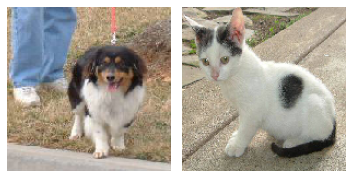

In [38]:
plot_image(sample_train_img)

In [41]:
img_list = glob.glob(path + '/*/*' + ".jpg")
img_list

['./img\\cat\\cat.0.jpg',
 './img\\cat\\cat.1.jpg',
 './img\\cat\\cat.2.jpg',
 './img\\cat\\cat.3.jpg',
 './img\\cat\\cat.4.jpg',
 './img\\dog\\dog.1.jpg',
 './img\\dog\\dog.2.jpg',
 './img\\dog\\dog.3.jpg',
 './img\\dog\\dog.4.jpg',
 './img\\dog\\dog.5.jpg']

In [42]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [46]:
total_train = len(cat_list) + len(dog_list)
print("Total training sample:", total_train)

Total training sample: 10


In [43]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # binary classification

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
history = model.fit(train_img,
                    steps_per_epoch=total_train//batch_size,
                    epochs=epochs, verbose=1)

Epoch 1/10
5/5 [==============================] - 1s 230ms/step - loss: 1.4103 - accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.8489 - accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5001 - accuracy: 0.8000
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.4562 - accuracy: 0.8000
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1919 - accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1238 - accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0331 - accuracy: 1.0000
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 6.5130e-04 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 19ms/step - loss: 9.9664e-04 - accuracy: 1.0000


### **[Problem 2] Data expansion for classification dataset**

In [49]:
import albumentations as A
import cv2

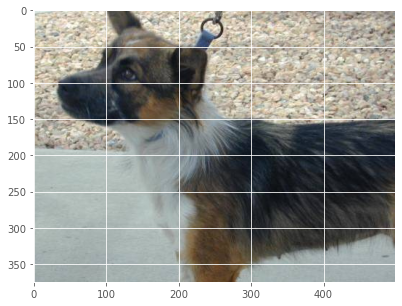

In [54]:
image = cv2.imread(train_dog_dir + '\\' + dog_list[2])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.imshow(image)

In [55]:
def transform_image_plot(img_path, transform, trans_title=""):
    og_img = cv2.imread(img_path)
    og_img = cv2.cvtColor(og_img, cv2.COLOR_BGR2RGB)

    transformed = transform(image=og_img)
    transformed_image = transformed["image"]

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    plt.subplots_adjust(wspace=0)
    plt.rcParams["font.size"] = 18

    ax[0].set_title("Original")
    ax[1].set_title(trans_title)

    ax[0].imshow(og_img)
    ax[1].imshow(transformed_image)

### Horizontal Flip

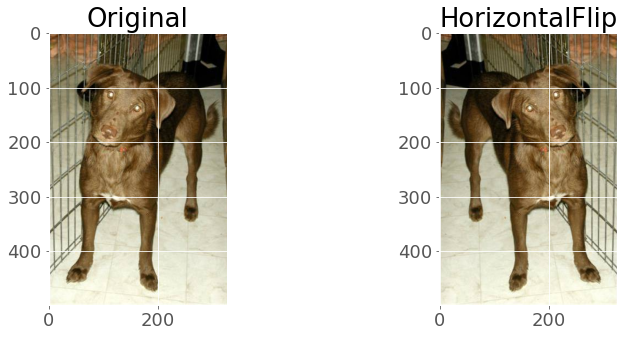

In [74]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=1)
])

transform_image_plot(train_dog_dir + '\\' + dog_list[0], transform, trans_title="HorizontalFlip")

### Vertical Flip

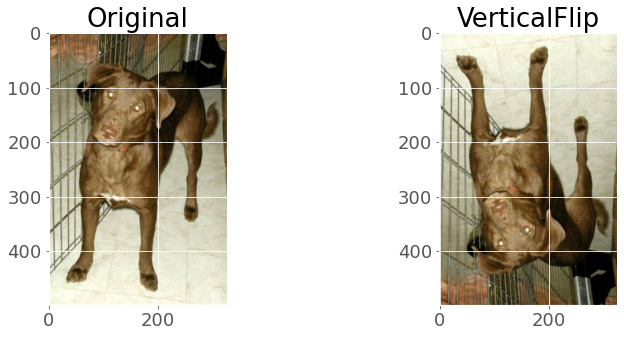

In [73]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.VerticalFlip(p=1)
])

transform_image_plot(train_dog_dir + '\\' + dog_list[0], transform, trans_title="VerticalFlip")

### Center Crop

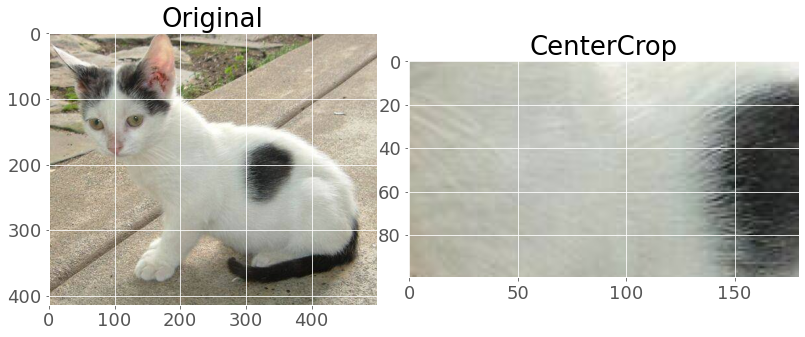

In [72]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.CenterCrop(height=100, width=180, p=1.0)
])

transform_image_plot(train_cat_dir + '\\' + cat_list[3], transform, trans_title="CenterCrop")

### Blur

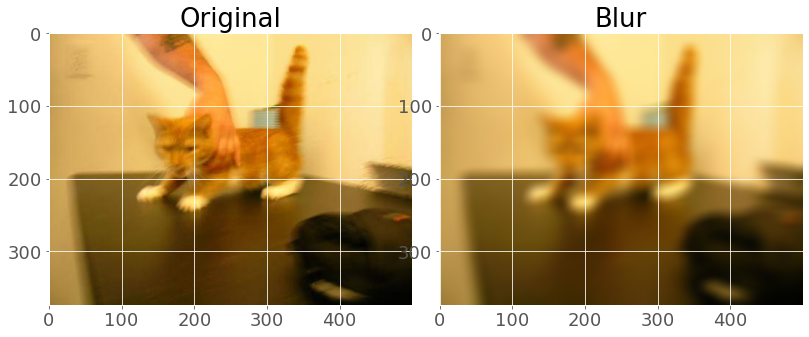

In [76]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.Blur(blur_limit=(1, 20), p=1)
])

transform_image_plot(train_cat_dir + '\\' + cat_list[0], transform, trans_title="Blur")

### HueSaturation

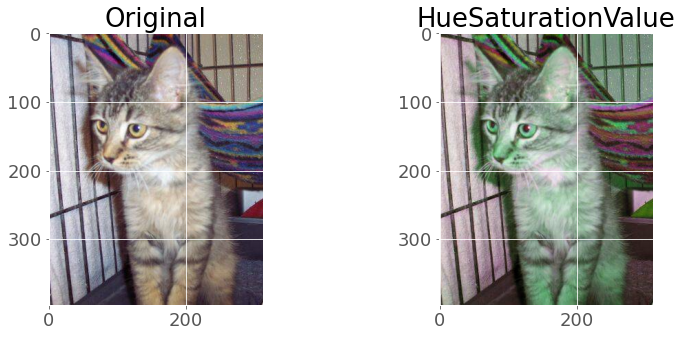

In [77]:
transform = A.Compose([
    A.HueSaturationValue(hue_shift_limit=(50, 50), p=1)
])
transform_image_plot(train_cat_dir + '\\' + cat_list[2], transform, trans_title="HueSaturationValue")

### ToGray

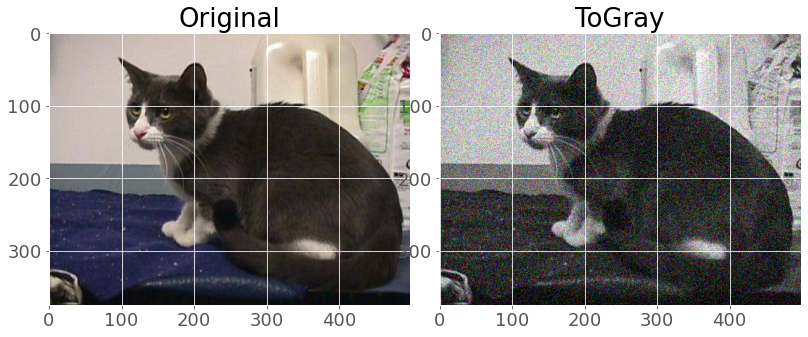

In [78]:
transform = A.Compose([
    A.ToGray(p=0.8),
    A.GaussNoise(var_limit=(1000, 1000), p=1 )
])
transform_image_plot(train_cat_dir + '\\' + cat_list[4], transform, trans_title="ToGray")

### **[Problem 3] Preparation of object detection dataset**

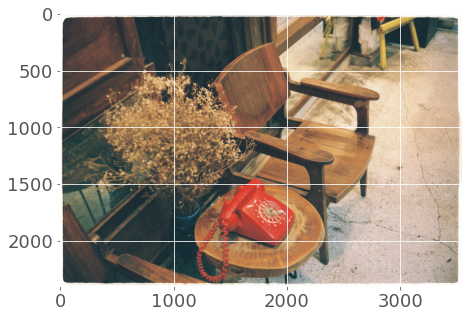

In [79]:
file_path = './000024.jpg'
image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.imshow(image)

In [83]:
xml_path = './000024.xml'

with open(xml_path, 'r') as f:
    print(f.read())

<annotation verified="yes">
	<folder>Week7</folder>
	<filename>000024.JPG</filename>
	<path>F:\CODE\DIVEINTOCODE\diveintocode-ml\Week7\000024.JPG</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>3543</width>
		<height>2397</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>phone</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1365</xmin>
			<ymin>1448</ymin>
			<xmax>2115</xmax>
			<ymax>2085</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>1277</xmin>
			<ymin>279</ymin>
			<xmax>2783</xmax>
			<ymax>2085</ymax>
		</bndbox>
	</object>
	<object>
		<name>tree</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>440</xmin>
			<ymin>460</ymin>
			<xmax>1390</xmax>
			<ymax>1904</ymax>
		</bndbox>
	</object>
<

In [81]:
import xml.etree.ElementTree as ET

tree = ET.parse(xml_path)
root = tree.getroot()

In [87]:
bboxes = []
category_ids = []
category_id_to_name  = {}
all_list = []

img_file = root.find('filename').text

for i, obj in enumerate(root.iter('object')):
    cls = obj.find('name').text
    xmlbox = obj.find('bndbox')
    b = [int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text)]

    bboxes.append(b)
    category_ids.append(i+1)
    category_id_to_name[i+1] = cls
    all_list.append([img_file] + b + [cls])
    
print(all_list)
print("bboxes: ", bboxes)
print("category_ids: ", category_ids)
print("category_id_to_name: ", category_id_to_name)

[['000024.JPG', 1365, 1448, 2115, 2085, 'phone'], ['000024.JPG', 1277, 279, 2783, 2085, 'chair'], ['000024.JPG', 440, 460, 1390, 1904, 'tree']]
bboxes:  [[1365, 1448, 2115, 2085], [1277, 279, 2783, 2085], [440, 460, 1390, 1904]]
category_ids:  [1, 2, 3]
category_id_to_name:  {1: 'phone', 2: 'chair', 3: 'tree'}


### **[Problem 4] Data expansion for object detection dataset**

In [100]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(w), int(y_min), int(h)
   
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 3, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=3, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
        thickness=3
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

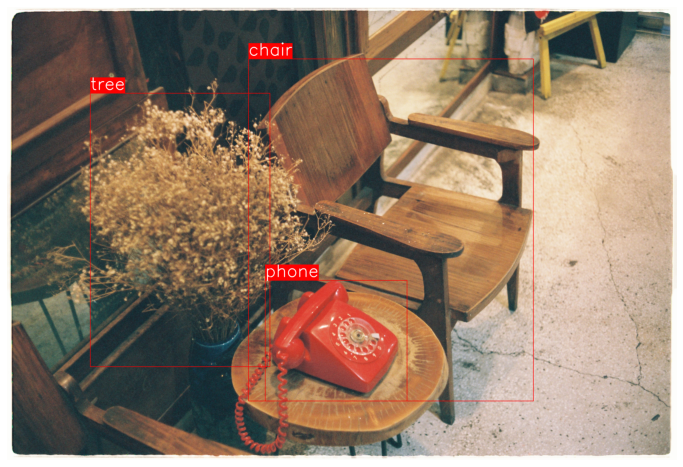

In [101]:
visualize(image, bboxes, category_ids, category_id_to_name)

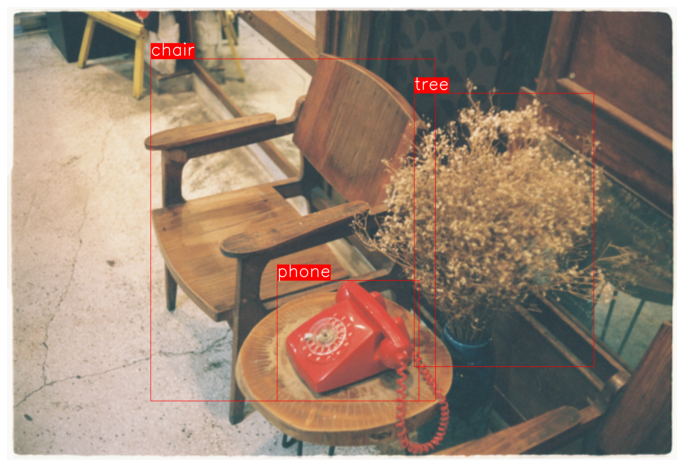

In [102]:
import random

transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.Blur(blur_limit=(1, 10), p=1)
    ],
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']),
)

random.seed(42)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)